In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-06 22:00:43,837 - kid_readout.<module>:13  kid_readout logging setup with default stream handler
INFO:kid_readout:kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/data/readout/2016-10-06_171805_20_dB_dac_thermal_pulse.nc')

In [4]:
ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [5]:
s1 = ssa.sweep_stream(1)

In [7]:
s1.x.shape

(4194304,)

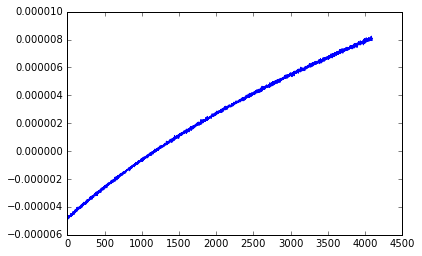

In [8]:
plot(s1.x[::1024])

In [9]:
xs = np.array([ssa.sweep_stream(k).x[::1024] for k in range(105)])

In [17]:
xs.shape

(128, 524288)

In [37]:
psds = np.array([mlab.psd(x,NFFT=2**16,Fs=ss.stream.stream_sample_rate)[0] for x in xs])

In [41]:
pxx,fr = mlab.psd(x,NFFT=2**16,Fs=ss.stream.stream_sample_rate)

In [38]:
psds.shape

(128, 32769)

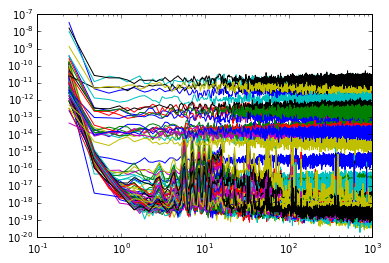

In [43]:
_=loglog(fr[:4096],psds[:,:4096].T)

In [10]:
xm = xs - xs.min(1)[:,None]

In [11]:
xb = xm/xm.max(1)[:,None]

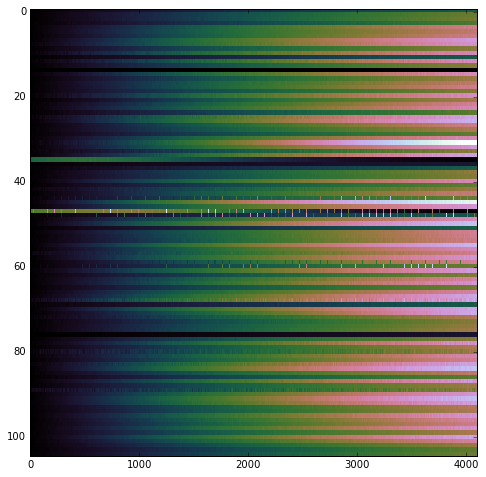

In [22]:
figure(figsize=(8,8))
imshow(xm*1e6,aspect='auto',cmap=cm.cubehelix,interpolation='nearest')
clim(0,30)

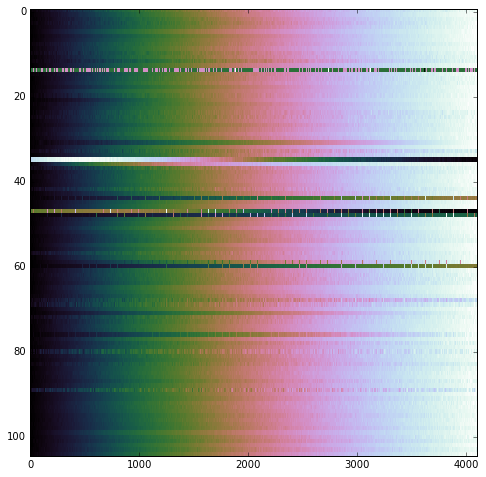

In [13]:
figure(figsize=(8,8))
imshow(xb,aspect='auto',cmap=cm.cubehelix,interpolation='nearest')
#clim(0,5)

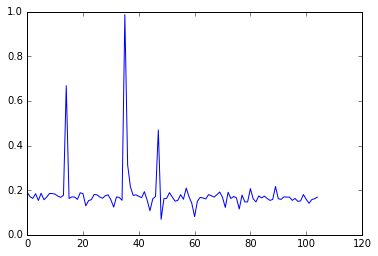

In [45]:
plot(xb[:,500])

In [49]:
xb.shape

(128, 5243)

In [14]:
ss = ssa.sweep_stream(0)

In [15]:
ss.stream.start_epoch()

1475788731.7456779

In [16]:
stream_length=2**22/(512e6/2**15)

In [24]:
stream_length

268.435456

In [17]:
from kid_readout.equipment import starcryo_temps

updated file list


In [38]:
package,_,load,_=starcryo_temps.get_temperatures_at(ss.stream.start_epoch()+np.linspace(0,stream_length,xb.shape[1])-40)

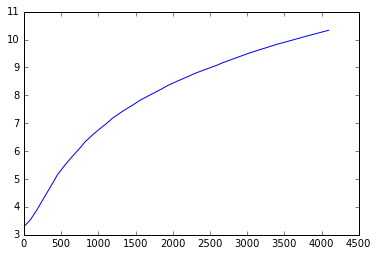

In [39]:
plot(load)

(0.01, 1.1)

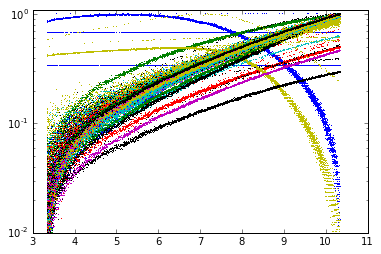

In [48]:
_=plot(load,xb.T,',')
yscale('log')
ylim(.01,1.1)

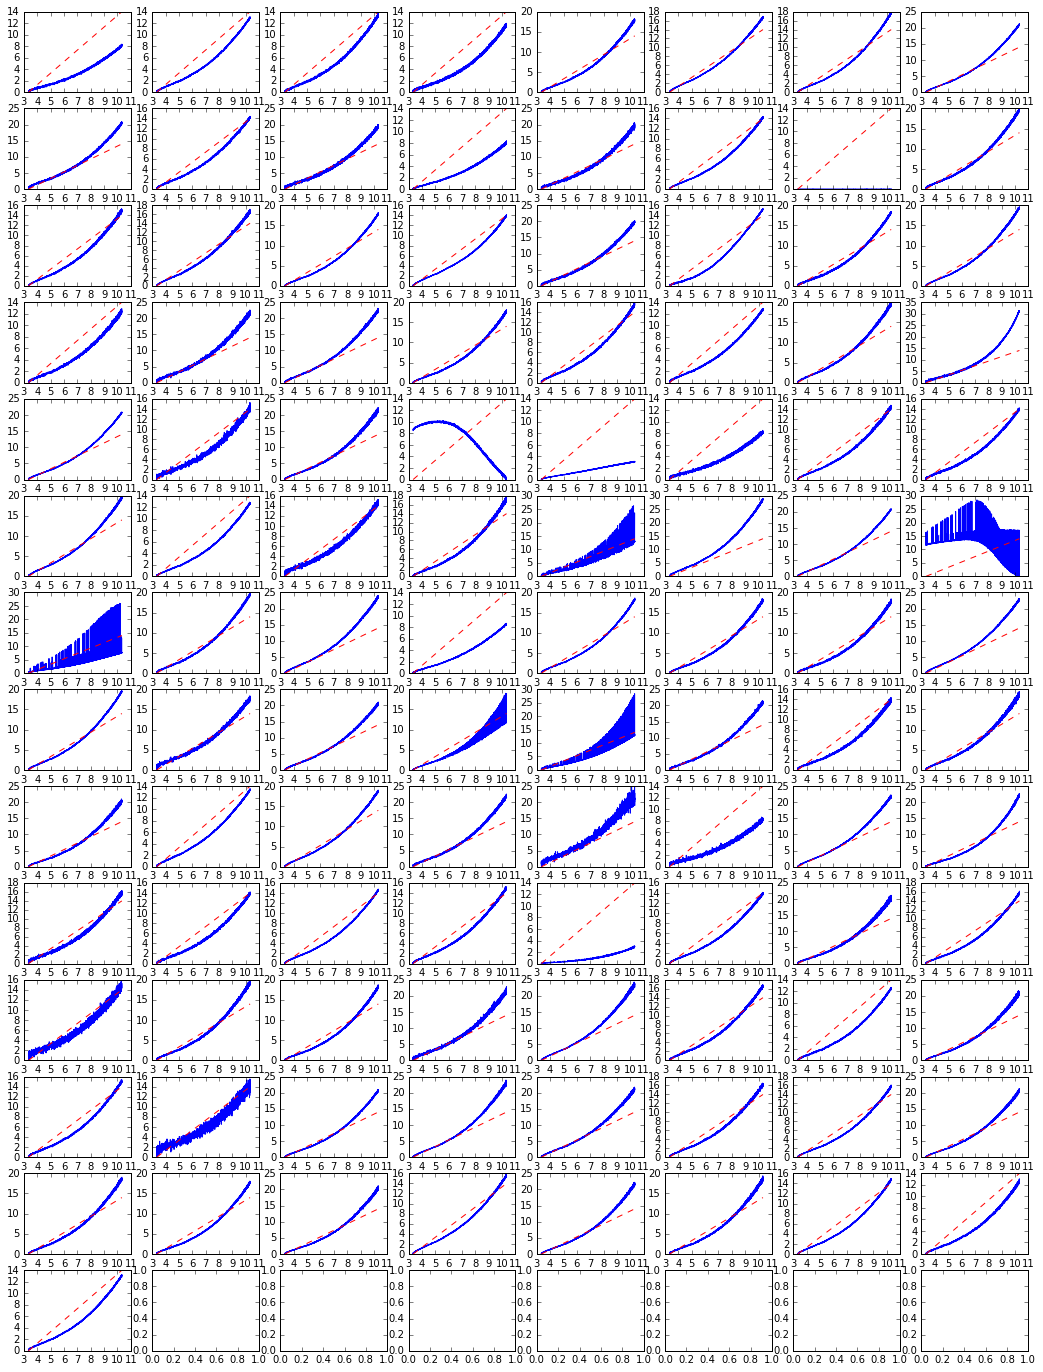

In [53]:
fig,axs = subplots(14,8,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    if k < 105:
        ax.plot(load,xm[k,:]*1e6)
        ax.plot(load,(load-load.min())*2.0,'r--')
        #ax.set_ylim(0,30)

In [28]:
xb.std(1).argmax()

14

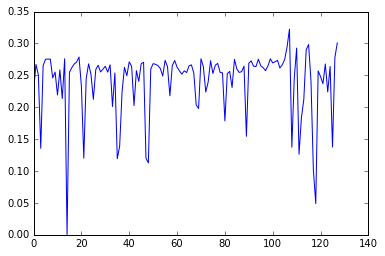

In [31]:
plot(xb.std(1))

In [29]:
xb[14,:]=0

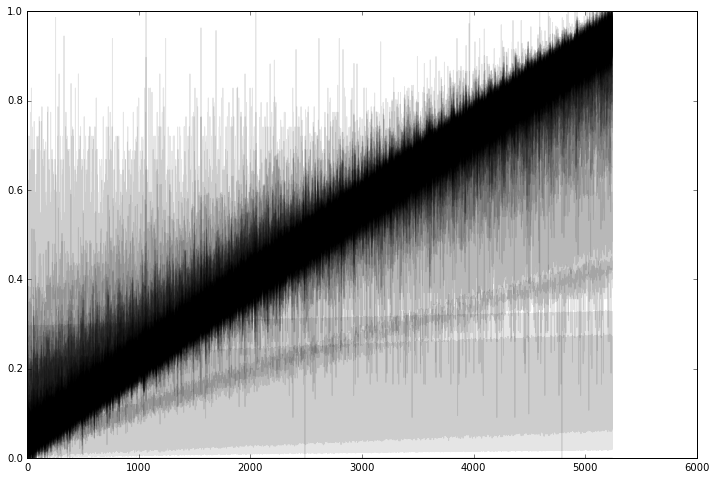

In [32]:
figure(figsize=(12,8))
_=plot(xb[:105,:].T,'k',alpha=0.1)

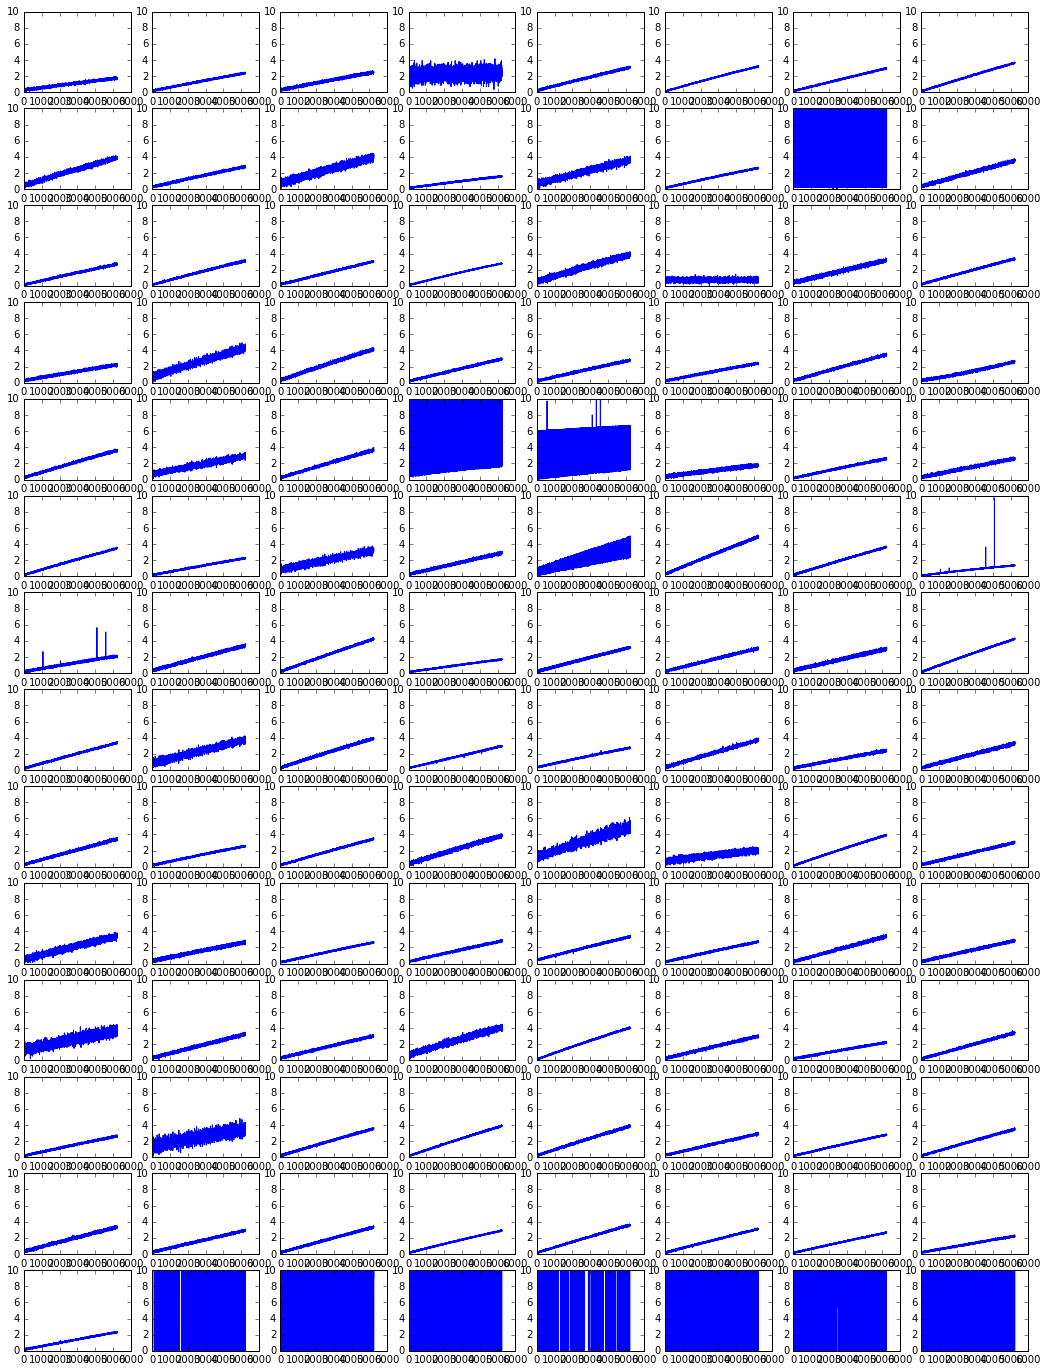

In [13]:
fig,axs = subplots(14,8,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    ss = ssa.sweep_stream(k)
    x = ss.x
    x = x - x.min()
    ax.plot(x[::100]*1e6)
    ax.set_ylim(0,10)